# 강화학습 공부
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: []

In [1]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

#### 지도학습(Supervised learning) vs 비지도학습(Unsupervised learning) vs 강화학습(Reinforcement learning)

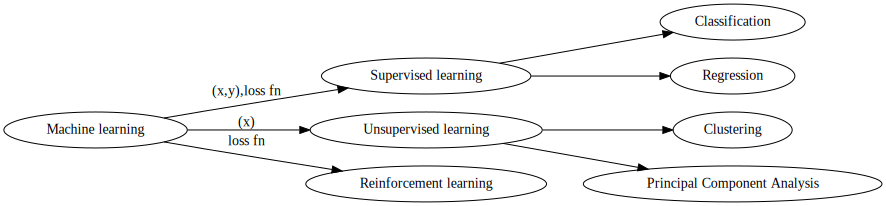

In [2]:
#collapse
gv(''' 
    "Machine learning" -> "Supervised learning"[label="(x,y),loss fn"]
    "Machine learning" -> "Unsupervised learning"[label="(x)"]
    "Machine learning" -> "Reinforcement learning"[label="loss fn"]
    "Supervised learning" -> "Classification"[label=""]
    "Supervised learning" -> "Regression"[label=""]
    "Unsupervised learning" -> "Clustering"[label=""]
    "Unsupervised learning" -> "Principal Component Analysis"[label=""]
''')


- in Supervised Learning, the goal is to **generate formula** based on input and output values. 
    - 입출력값으로 수식을 만드려는 지도학습
- In Unsupervised Learning, we find an **association** between input values and **group** them. 
    - 입력값으로 그룹화하거나 그 사이 관계를 찾으려는 비지도학습
- In Reinforcement Learning an agent learn through delayed feedback by **interacting with the environment**.
    - 환경과 상호작용으로 보상을 통해 배워가려는 강화학습

### 

https://www.gocoder.one/blog/reinforcement-learning-project-ideas

---

toy example ref: https://www.gocoder.one/blog/rl-tutorial-with-openai-gym

In [3]:
import numpy as np
import gym
import random

create Taxi environment
The following snippet will import the necessary packages, and create the Taxi environment:

In [4]:
env = gym.make('Taxi-v3')

create a new instance of taxi, and get the initial state
Note: Yellow = taxi, Blue letter = pickup location, Purple letter = drop-off destination
To get the initial state:

In [5]:
state = env.reset()

Next, we'll run a for-loop to cycle through the game. At each iteration, our agent will:
1. Make a random action from the action space (0 - south, 1 - north, 2 - east, 3 - west, 4 - pick-up, 5 - drop-off)
    - 행동 공간에서 임의의 행동 하기(0-남쪽, 1-북쪽, 3-서쪽, 4-픽업,5-하차)
2. Receive the new state
    - 새 상태를 받기


Here's our random agent script:

In [6]:
num_steps = 5
for s in range(num_steps+1):
    print(f"step: {s} out of {num_steps}")

    # sample a random action from the list of available actions
    action = env.action_space.sample()

    # perform this action on the environment
    env.step(action)

    # print the new state
    env.render()

step: 0 out of 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
step: 1 out of 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
step: 2 out of 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
step: 3 out of 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
step: 4 out of 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
step: 5 out of 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


end this instance of the taxi environment

A Q-table is simply a look-up table storing values representing the maximum expected future rewards our agent can expect for a certain action in a certain state (known as Q-values).
- Q table이란 에이전트가 특정 상태에서 특정 행동에 기대할 수 있는 최대 기대 보상을 나타내는 값을 wjwkdgkms 테이블

In [7]:
state_size = env.observation_space.n  # total number of states (S)
action_size = env.action_space.n      # total number of actions (A)

# initialize a qtable with 0's for all Q-values
qtable = np.zeros((state_size, action_size))

`-` Q-learning algorithm

The Q-learning algorithm will help our agent update the current Q-value $(Q(S_t,A_t))$ with its observations after taking an action. I.e. increase Q if it encountered a positive reward, or decrease Q if it encountered a negative one.
- Q학습 알고리즙은 에이전트가 행동을 한 후에 관찰한 것으로 현재 Q값$(Q(S_t,A_t))$을 업데이트하는데 도움이 된다.
- 긍정적인 보상이 있으면 Q가 증가하고, 부정적인 보상이 있으면 Q가 감소한다.

Note that in Taxi, our agent doesn't receive a positive reward until it successfully drops off a passenger (+20 points). Hence even if our agent is heading in the correct direction, there will be a delay in the positive reward it should receive.
- 택시에서 에이전트는 승객이 성공적으로 내릴때까지 긍정적인 보상을 받지 않는다.
- 그래서 옳은 방향으로 가고 있다고 해도 보상을 받지 못하고 지연됨.

$$\gamma max_a Q(S_{t+1},a)$$

This term adjusts our current Q-value to include a portion of the rewards it may receive sometime in the future (St+1). The 'a' term refers to all the possible actions available for that state. The equation also contains two hyperparameters which we can specify:
- 미래에 받을 수 있는 보상의 일부를 포함하도록 현재 Q값을 조정한다.

Learning rate (α): how easily the agent should accept new information over previously learnt information
- 얼마나 쉽게 에이전트가 이전에 학습된 정보보다 새로운 정보를 받아야 하는지

Discount factor (γ): how much the agent should take into consideration the rewards it could receive in the future versus its immediate reward
- 에이전트가 즉각적인 보상 대비 미래에 받을 수 있는 보상을 얼마나 고려해야 하는지

Q algorithm 구현

```python
learning_rate = 0.9
discount_rate = 0.8

# Qlearning algorithm: Q(s,a) := Q(s,a) + learning_rate * (reward + discount_rate * max Q(s',a') - Q(s,a))
qtable[state, action] += learning_rate * (reward + discount_rate * np.max(qtable[new_state,:]) - qtable[state,action])
```

We can let our agent explore to update our Q-table using the Q-learning algorithm. As our agent learns more about the environment, we can let it use this knowledge to take more optimal actions and converge faster - known as exploitation.
- 익스플로잇exploitation: 에이전트가 환경에 대해 더 많이 알게 되면 이 지식을 사용하여 더 최적의 조치를 취하고 더 빠르게 수렴할 수 있도록 할 수 있음

```python
# exploration-exploitation tradeoff
epsilon = 1.0     # probability that our agent will explore

decay_rate = 0.01 # of epsilon

if random.uniform(0,1) < epsilon:
    # explore
    action = env.action_space.sample()
else:
    # exploit
    action = np.argmax(qtable[state,:])

# epsilon decreases exponentially --> our agent will explore less and less
epsilon = np.exp(-decay_rate*episode)
# 각 단계마다 기하급수적으로 감소하므로 에이전트가 시간이 지남에 따라 탐색하는 횟수가 줄어듭니다.
```

In [8]:
import numpy as np
import gym
import random

def main():

    # create Taxi environment
    env = gym.make('Taxi-v3')

    # initialize q-table
    state_size = env.observation_space.n
    action_size = env.action_space.n   
    qtable = np.zeros((state_size, action_size))

    # hyperparameters
    learning_rate = 0.9
    discount_rate = 0.8
    epsilon = 1.0
    decay_rate= 0.005

    # training variables
    num_episodes = 1000
    max_steps = 99 # per episode

    # training
    for episode in range(num_episodes):

        # reset the environment
        state = env.reset()
        done = False

        for s in range(max_steps):

            # exploration-exploitation tradeoff
            if random.uniform(0,1) < epsilon:
                # explore
                action = env.action_space.sample()
            else:
                # exploit
                action = np.argmax(qtable[state,:])

            # take action and observe reward
            new_state, reward, done, info = env.step(action)

            # Q-learning algorithm
            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])

            # Update to our new state
            state = new_state

            # if done, finish episode
            if done == True:
                break

        # Decrease epsilon
        epsilon = np.exp(-decay_rate*episode)

    print(f"Training completed over {num_episodes} episodes")
    input("Press Enter to watch trained agent...")

    # watch trained agent
    state = env.reset()
    done = False
    rewards = 0

    for s in range(max_steps):

        print(f"TRAINED AGENT")
        print("Step {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        rewards += reward
        env.render()
        print(f"score: {rewards}")
        state = new_state

        if done == True:
            break

    env.close()

if __name__ == "__main__":
    main()

Training completed over 1000 episodes


Press Enter to watch trained agent... 


TRAINED AGENT
Step 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
score: -1
TRAINED AGENT
Step 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
score: -2
TRAINED AGENT
Step 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
score: -3
TRAINED AGENT
Step 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
score: -4
TRAINED AGENT
Step 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
score: -5
TRAINED AGENT
Step 6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
score: -6
TRAINED AGENT
Step 7
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
score: -7
TRAINED AGENT
Step 8
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
score: -8
T